In [1]:
%config InlineBackend.print_figure_kwargs={'facecolor': "w"}

import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

CURR_PATH = os.getcwd()
print(CURR_PATH)

/Users/pro/Documents/graph_fraud_detection_kaggle


In [2]:
data_file = '/data/train_v2.csv'
df_train = pd.read_csv(CURR_PATH + data_file, header=0, index_col=0)

/Users/pro/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
print(df_train.shape)

(1006717, 33)


In [4]:
df_train_demo = df_train[:10]
filename_demo = 'train_v2_demo.csv'
filename_with_path = f"{CURR_PATH}/data/{filename_demo}"

df_train_demo.to_csv (filename_with_path,
                      index = False, header=True)

In [5]:
display(df_train_demo.head())

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,hour,dt_dif1_chid,dt_dif2_cano,dt_dif1_cano_mchno,pct_of_mchno_fraud_1m,avg_mchno_fraud_amt_1m,avg_scity_fraud_amt_1w,ratio_mchno_notfraud_avg_amt_distance_1m,ratio_cumcnt_cano_ecfg_w,ratio_cumsum_bacno_d
0,6231,116316,0,618.99,5,62,0,4,N,N,...,15,0.0,0.0,0.0,0.000000,0.000000,9238.495714,-0.478767,0.0,1.526163e+01
5,6032,116316,0,283.91,5,62,0,4,N,N,...,14,0.0,0.0,0.0,0.000000,0.000000,5778.434286,-0.986162,0.0,2.839100e+07
6,6032,116316,0,250.19,5,62,0,4,N,N,...,14,0.0,0.0,0.0,0.001718,38.156333,6839.184286,-0.987419,0.0,1.939672e+00
7,6032,116316,0,428.26,5,62,0,4,N,N,...,13,0.0,0.0,0.0,0.000000,0.000000,5832.098571,-0.980959,0.0,4.282600e+07
8,6032,116316,0,555.43,5,62,0,4,N,N,...,15,0.0,0.0,0.0,0.000000,0.000000,2386.308571,11.079640,0.0,5.554300e+07


In [48]:
# cat_col = ['bacno', ]
df_train.nunique()

acqic                                          5162
bacno                                         89771
cano                                         117201
conam                                         55897
contp                                             7
csmcu                                            66
ecfg                                              2
etymd                                            11
flbmk                                             2
flg_3dsmk                                         2
fraud_ind                                         2
hcefg                                             9
insfg                                             2
iterm                                             9
locdt                                            60
loctm                                         82692
mcc                                             420
mchno                                         73096
ovrlt                                             2
scity       

In [28]:
picked_cols = \
['hour', 'dt_dif1_chid', 
 'dt_dif2_cano', 'dt_dif1_cano_mchno', 
 'pct_of_mchno_fraud_1m', 'avg_mchno_fraud_amt_1m',
 'avg_scity_fraud_amt_1w', 'ratio_mchno_notfraud_avg_amt_distance_1m',
 'ratio_cumcnt_cano_ecfg_w', 'ratio_cumsum_bacno_d']
 
# picked_cols = \
# ['dt_dif2_cano', 'dt_dif1_cano_mchno', 
# ]

In [43]:
def show_hist(df, selected_cols):
    for curr_col in selected_cols:
        print(curr_col)
        plt.figure()
        plt.hist(df[curr_col], bins = 20, 
                  stacked=True, density=True, align='mid')
#         df[curr_col].plot.hist(bins = 10, align='mid')
        plt.tight_layout()
        plt.grid(True)
        plt.show()

hour


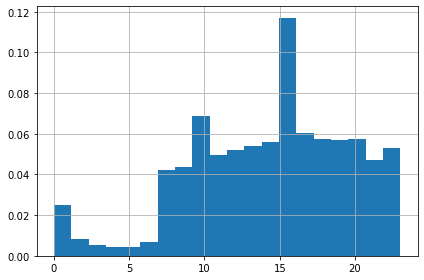

dt_dif1_chid


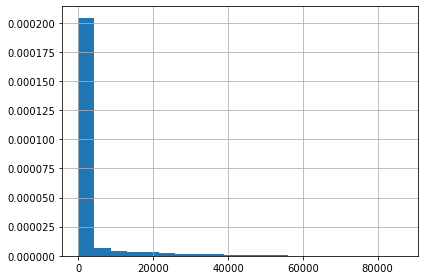

dt_dif2_cano


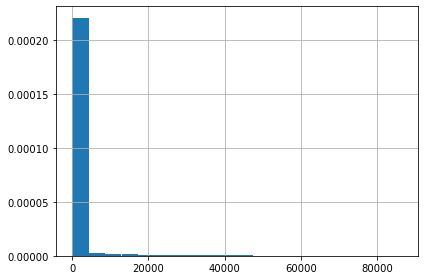

dt_dif1_cano_mchno


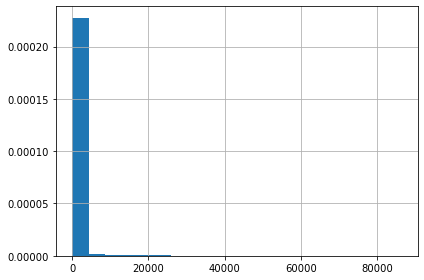

pct_of_mchno_fraud_1m


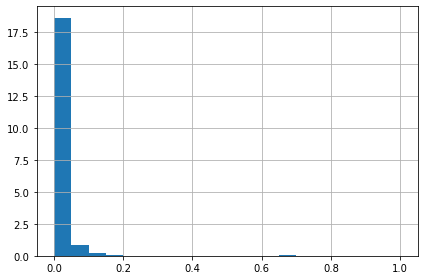

avg_mchno_fraud_amt_1m


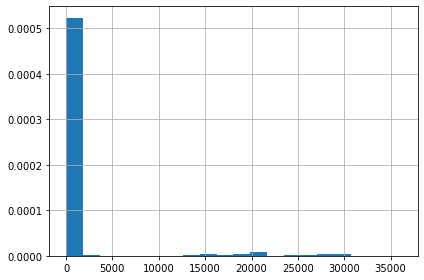

avg_scity_fraud_amt_1w


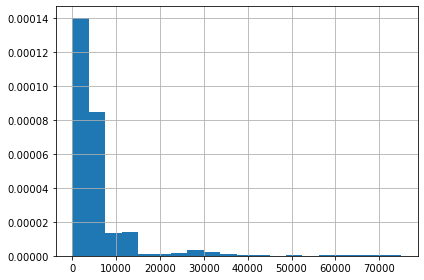

ratio_mchno_notfraud_avg_amt_distance_1m


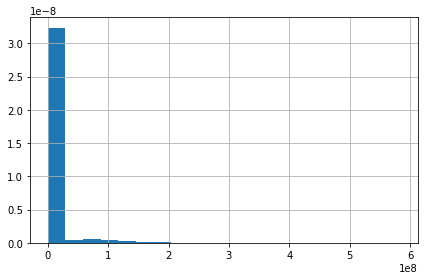

ratio_cumcnt_cano_ecfg_w


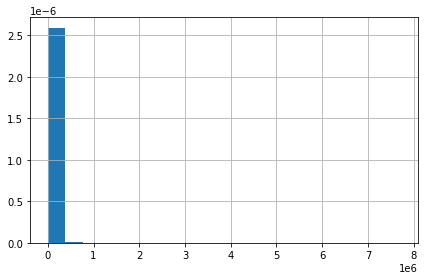

ratio_cumsum_bacno_d


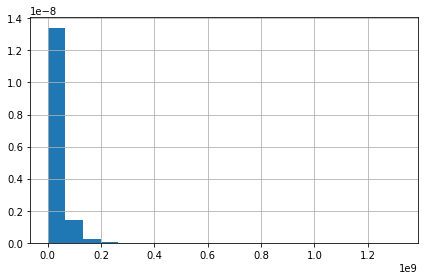

In [44]:
show_hist(df_train, picked_cols)

In [45]:
df_train_demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 19
Data columns (total 33 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   acqic                                     10 non-null     int64  
 1   bacno                                     10 non-null     int64  
 2   cano                                      10 non-null     int64  
 3   conam                                     10 non-null     float64
 4   contp                                     10 non-null     int64  
 5   csmcu                                     10 non-null     int64  
 6   ecfg                                      10 non-null     int64  
 7   etymd                                     10 non-null     int64  
 8   flbmk                                     10 non-null     object 
 9   flg_3dsmk                                 10 non-null     object 
 10  fraud_ind                               

In [46]:
df_train[picked_cols].describe()

,hour,dt_dif1_chid,dt_dif2_cano,dt_dif1_cano_mchno,pct_of_mchno_fraud_1m,avg_mchno_fraud_amt_1m,avg_scity_fraud_amt_1w,ratio_mchno_notfraud_avg_amt_distance_1m,ratio_cumcnt_cano_ecfg_w,ratio_cumsum_bacno_d
count,1.006717e+06,1.006717e+06,1.006717e+06,1.006717e+06,1.006717e+06,1.006717e+06,1.006717e+06,1.006717e+06,1.006717e+06,1.006717e+06
mean,1.433051e+01,2.595823e+03,1.144425e+03,4.831213e+02,1.265799e-02,1.190764e+03,5.119724e+03,5.790267e+06,1.057681e+04,1.730814e+07
std,5.205202e+00,8.375091e+03,6.074580e+03,3.881298e+03,6.832390e-02,4.969185e+03,8.368379e+03,2.582179e+07,9.287047e+04,3.919981e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00
25%,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.808583e-01,0.000000e+00,1.279215e+00
50%,1.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.457453e+03,-8.005353e-01,0.000000e+00,3.399804e+00
75%,1.800000e+01,2.500000e+01,0.000000e+00,0.000000e+00,6.168270e-05,0.000000e+00,6.268214e+03,9.976221e-01,9.230741e-01,1.657059e+01
max,2.300000e+01,8.631200e+04,8.631100e+04,8.631200e+04,1.000000e+00,3.610070e+04,7.498529e+04,5.833700e+08,7.700000e+06,1.320937e+09


In [ ]:
data_file = '/data/test_v2.csv'
df_test = pd.read_csv(CURR_PATH + data_file, header=0, index_col=0)

### Create embedding

In [49]:
import pandas as pd
import keras
from keras import models
from keras.layers import Embedding, Dense, Flatten
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline 

In [ ]:
scaler = MinMaxScaler()
data_small_df['cnt_Scaled'] = scaler.fit_transform(data_small_df[['cnt']])
data_small_df.head()

In [ ]:
print(df_train.shape)
print(df_test.shape)

In [ ]:
essential_info_cols = ['txkey', 'fraud_ind']
desired_factors_cols = \
['hour', 'dt_dif1_chid', 'dt_dif2_cano', 'dt_dif1_cano_mchno',
 'pct_of_mchno_fraud_1m', 'avg_mchno_fraud_amt_1m',
 'avg_scity_fraud_amt_1w', 'ratio_mchno_notfraud_avg_amt_distance_1m',
 'ratio_cumcnt_cano_ecfg_w', 'ratio_cumsum_bacno_d']

basic_info = essential_info_cols + desired_factors_cols 

In [ ]:
df_train = df_train[basic_info]

In [ ]:
df_train.describe()


In [ ]:
df_train.info()


In [ ]:
df_train['txkey'] = df_train.txkey.astype('object')

In [ ]:
df_train.info()

In [ ]:
y = df_train.fraud_ind
y = y.astype(np.int64)
X = df_train.drop(['fraud_ind'], axis = 1).select_dtypes(exclude=['object'])

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X.values, 
                                                    y.to_numpy(), 
                                                    test_size=0.25,
                                                    random_state = 123)

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
train_X = imputer.fit_transform(train_X)
test_X = imputer.transform(test_X)

In [ ]:
from xgboost import XGBClassifier

my_quick_model = XGBClassifier()
# Add silent=True to avoid printing out updates with each cycle
my_quick_model.fit(train_X, train_y, verbose=False)

In [ ]:
pred_y = my_quick_model.predict(test_X)
predictions = [round(value) for value in pred_y]

In [ ]:
from sklearn.metrics import accuracy_score

# evaluate predictions
accuracy = accuracy_score(test_y, predictions)
print(f"Accuracy: {accuracy * 100.0:.2f}%")

In [ ]:
{i:predictions.count(i) for i in np.unique(predictions)}

### Test data prediction submission

In [ ]:
test_data_for_sub = df_test[desired_factors_cols].values

In [ ]:
pred_y_sub = my_quick_model.predict(test_data_for_sub)

In [ ]:
unique, counts = np.unique(pred_y_sub, return_counts=True)
dict(zip(unique, counts))

In [ ]:
df_id_y_sub = pd.DataFrame({
        "TXKEY": df_test['txkey'],
        "FRAUD_IND": pred_y_sub
        })

In [ ]:
print (df_id_y_sub['FRAUD_IND'].value_counts())

In [ ]:
df_id_y_sub.to_csv('submission.csv',index=False)

In [ ]:
ready_for_submission = False

In [ ]:
### Submit your result
if ready_for_submission:
    Message = "default message"
    !kaggle competitions submit -c 2021-graph-vs-time-series -f submission.csv -m '$Message'
    print ("You just submitted your prediction.")
else:
    print ("Not yet.")

In [ ]:
df_train['fraud_ind'].value_counts()

In [ ]:
# df_train.filter(df_train['fraud_ind'] <= 0.5).describe()

### Archive

In [ ]:
# check_value_cnt = ['mcc', 'mchno', 'fraud_ind']
# for x in check_value_cnt:
#     print(f'Showing column {x}...')
#     display(df_train[x].value_counts())
